In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('full_tiki.csv')
df.head()

,Name,Category,List-Price,Price,Total Review,Rating Average,Discount,Discount Rate
0,Nước Xả Vải Comfort Cho Da Nhạy Cảm (3.2L/Túi)...,Chăm sóc nhà cửa,209000,168000,1777,4.7,41000,20
1,Túi Nước Giặt Omo Matic Bền Đẹp Cửa Trước 3.7Kg,Chăm sóc nhà cửa,199000,150000,32,5.0,49000,25
2,Túi Nước Giặt OMO Matic Comfort Hương Tinh dầu...,Chăm sóc nhà cửa,199000,161000,26,5.0,38000,19
3,Nước Giặt Ariel Hương Downy Túi 3.2Kg,Chăm sóc nhà cửa,186000,149000,224,4.8,37000,20
4,Combo 2 Túi Nước Giặt Omo Matic Bền Đẹp Cửa Tr...,Chăm sóc nhà cửa,254000,203000,255,4.8,51000,20


In [2]:
len(df)

1625

In [3]:
df['Discount Rate'].isnull().sum()  # đếm số giá trị thiếu trong cột

0

In [4]:
df['Price'].isnull().sum() 

0

# TRỰC QUAN HÓA DỮ LIỆU

In [5]:
df['Category'].value_counts()

Thực phẩm                     222
Đồ dùng nhà bếp               208
Làm Đẹp - Sức Khỏe            174
Máy Ảnh - Máy Quay Phim       173
Thiết Bị Số - Phụ Kiện Số     172
Sách                          172
Chăm sóc thú cưng             172
Điện Thoại - Máy Tính Bảng    167
Chăm sóc nhà cửa              165
Name: Category, dtype: int64

Có 10 loại sản phẩm được ưa chuộng 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Thực phẩm'),
  Text(1, 0, 'Đồ dùng nhà bếp'),
  Text(2, 0, 'Làm Đẹp - Sức Khỏe'),
  Text(3, 0, 'Máy Ảnh - Máy Quay Phim'),
  Text(4, 0, 'Thiết Bị Số - Phụ Kiện Số'),
  Text(5, 0, 'Sách'),
  Text(6, 0, 'Chăm sóc thú cưng'),
  Text(7, 0, 'Điện Thoại - Máy Tính Bảng'),
  Text(8, 0, 'Chăm sóc nhà cửa')])

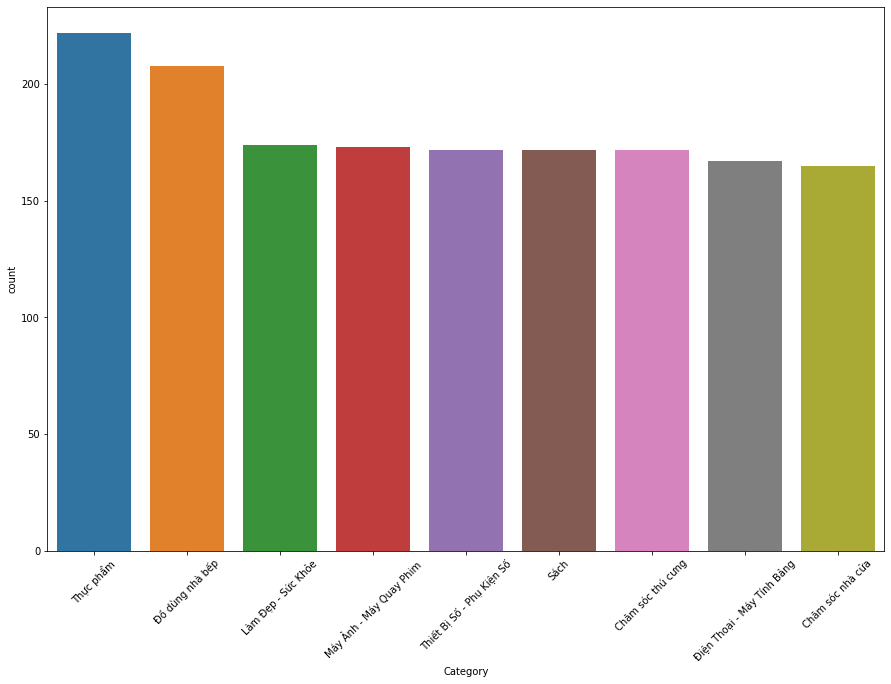

In [6]:
df['Category'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(x='Category', data=df, order = df['Category'].value_counts().index )
plt.xticks(rotation=45)

In [7]:
max(df['Price'])

36990000

In [8]:
min(df['Price'])

5999

<AxesSubplot:>

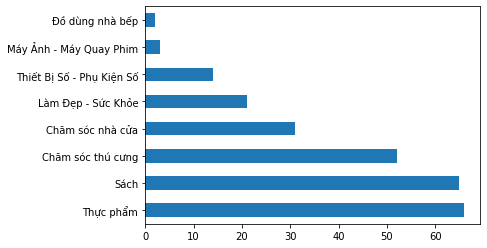

In [9]:
data = df.copy()
data_100nghin = data.loc[data['List-Price'] <= 100000]
data_100nghin['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

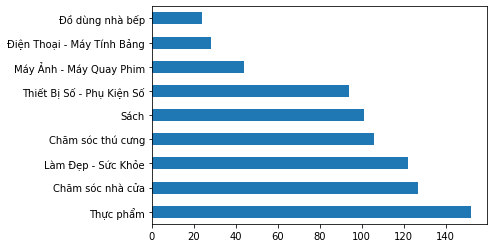

In [10]:
data_500nghin = data.loc[ (100000 < data['List-Price']) & ( data['List-Price'] <= 500000 )]
data_500nghin['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

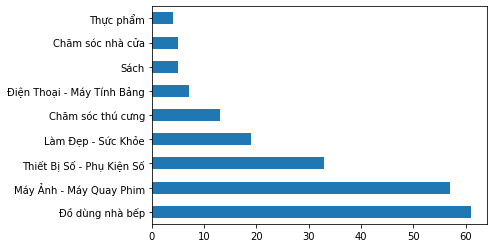

In [11]:
data_1trieu = data.loc[ (500000 < data['List-Price']) & ( data['List-Price'] <= 1000000 )]
data_1trieu['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

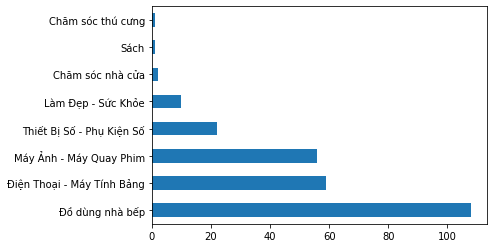

In [12]:
data_5trieu = data.loc[ (1000000 < data['List-Price']) & ( data['List-Price'] <= 5000000 )]
data_5trieu['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

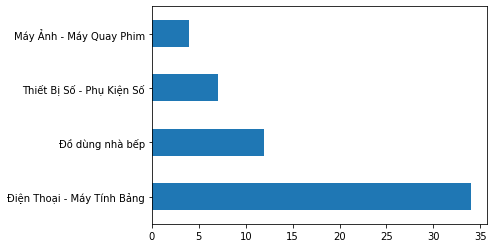

In [13]:
data_10trieu = data.loc[ (5000000 < data['List-Price']) & ( data['List-Price'] <= 10000000 )]
data_10trieu['Category'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

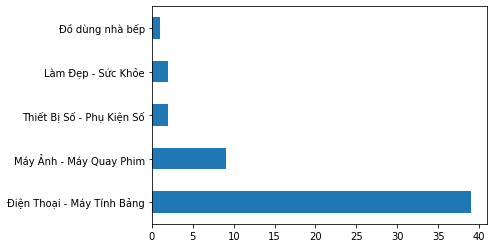

In [14]:
data_L10trieu = data.loc[ (10000000 < data['List-Price'])]
data_L10trieu['Category'].value_counts().plot(kind = 'barh')

In [15]:
data = df.copy()
data.loc[data['Total Review'] == 0,'Total Review'] = 3
data['Total Review']

0       1777
1         32
2         26
3        224
4        255
        ... 
1620      28
1621       4
1622       8
1623       3
1624      12
Name: Total Review, Length: 1625, dtype: int64